In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
from tensorflow.keras.datasets import fashion_mnist

In [79]:
(x_train, y_train),(x_test, y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [80]:
x_train.shape

(60000, 28, 28)

In [81]:
example= x_train[0]

In [82]:
example.shape

(28, 28)

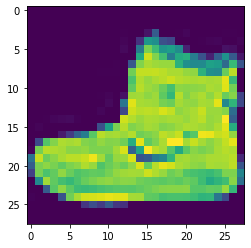

In [83]:
plt.imshow(example)

In [84]:
# default color mapping is vivid, it represent only two color scheme. we can change it to show gray scale only

In [91]:
y_test.shape

(10000,)

In [87]:
# we have to convert the numbers into various categories, it seems numbers to the network. we have to use one hot encoding to convert
# these numbers into categories


In [92]:
from tensorflow.keras.utils import to_categorical
y_cat_train= to_categorical(y_train,  num_classes=10)
y_cat_test= to_categorical(y_test, num_classes=10)


In [93]:
y_cat_test.shape

(10000, 10)

In [94]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [95]:
y_train[1]

0

In [96]:
#normalization of images is simple
x_scaled_train= x_train/255
x_scaled_test= x_test/255

In [97]:
x_scaled_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [98]:
#reshaping data to 4D
x_train.shape

(60000, 28, 28)

In [100]:
x_scaled_train= x_scaled_train.reshape(60000, 28, 28,1)

In [101]:
x_scaled_test= x_scaled_test.reshape(10000, 28, 28,1)

In [102]:
x_train= x_train.reshape(60000, 28, 28,1)
x_test= x_test.reshape(10000, 28, 28,1)

In [103]:
# batch size, width, height, color channel. this is 1 channel sample

In [104]:
from tensorflow.keras.models import Sequential

In [105]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [106]:
model= Sequential()
model.add(Conv2D(filters= 32, kernel_size= (4,4),strides=(1, 1),padding='valid', input_shape= (28,28,1), activation= 'relu'))
#after convolution layer , there comes a pooling layer. we use maxpool
model.add(MaxPool2D(pool_size=(2,2)))


#after Pooling we have to flatten the image and then apply the dense layers
model.add(Flatten())


model.add(Dense(128, activation= 'relu'))

#Output layer
model.add(Dense(10, activation= 'softmax'))
model.compile(loss= 'categorical_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

# keras.io/metrics to view different options

In [107]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop= EarlyStopping(monitor= 'val_loss', patience=1)

In [108]:
model.fit(x_scaled_train, y_cat_train,epochs=10, validation_data=(x_scaled_test, y_cat_test), callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 37s 612us/sample - loss: 0.4108 - accuracy: 0.8538 - val_loss: 0.3359 - val_accuracy: 0.8800
Epoch 2/10
60000/60000 [==============================] - 37s 609us/sample - loss: 0.2855 - accuracy: 0.8959 - val_loss: 0.2938 - val_accuracy: 0.8935
Epoch 3/10
60000/60000 [==============================] - 38s 626us/sample - loss: 0.2388 - accuracy: 0.9121 - val_loss: 0.2638 - val_accuracy: 0.9040
Epoch 4/10
60000/60000 [==============================] - 38s 630us/sample - loss: 0.2043 - accuracy: 0.9237 - val_loss: 0.2744 - val_accuracy: 0.9033


In [109]:
metrics= pd.DataFrame(model.history.history)

In [110]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.410763,0.853833,0.335910,0.8800
1,0.285467,0.895850,0.293762,0.8935
2,0.238756,0.912117,0.263809,0.9040
3,0.204287,0.923667,0.274360,0.9033


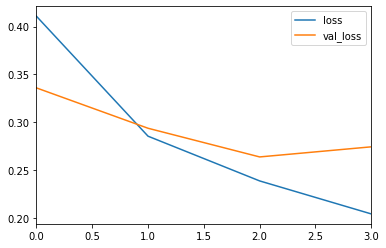

In [111]:
metrics[['loss', 'val_loss']].plot()

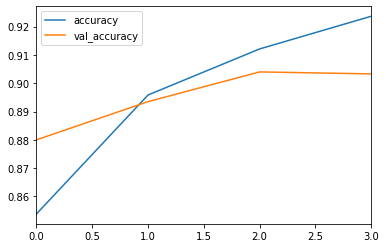

In [112]:
metrics[['accuracy', 'val_accuracy']].plot()

In [113]:
model.evaluate(x_scaled_test, y_cat_test, verbose= 0)

[0.274360184776783, 0.9033]

In [114]:
from sklearn.metrics import confusion_matrix, classification_report

In [115]:
predictions= model.predict_classes(x_scaled_test)

In [116]:
predictions.shape

(10000,)

In [117]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85      1000
           1       0.98      0.98      0.98      1000
           2       0.87      0.83      0.85      1000
           3       0.92      0.91      0.91      1000
           4       0.76      0.94      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.85      0.58      0.69      1000
           7       0.93      0.98      0.95      1000
           8       0.98      0.99      0.98      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



In [118]:
print(confusion_matrix(y_test, predictions))

[[906   0  21  17   5   3  39   0   8   1]
 [  2 985   0   6   4   0   1   0   2   0]
 [ 12   3 834   6 110   0  35   0   0   0]
 [ 17  14  11 907  32   0  16   0   3   0]
 [  1   1  24  21 939   0  11   0   3   0]
 [  0   0   0   0   0 979   0  19   0   2]
 [179   1  69  28 138   0 579   0   6   0]
 [  0   0   0   0   0   4   0 983   1  12]
 [  3   1   1   1   2   3   0   3 986   0]
 [  0   0   0   0   0  10   1  54   0 935]]


In [119]:
#viewing results as heatmap
import seaborn as sns


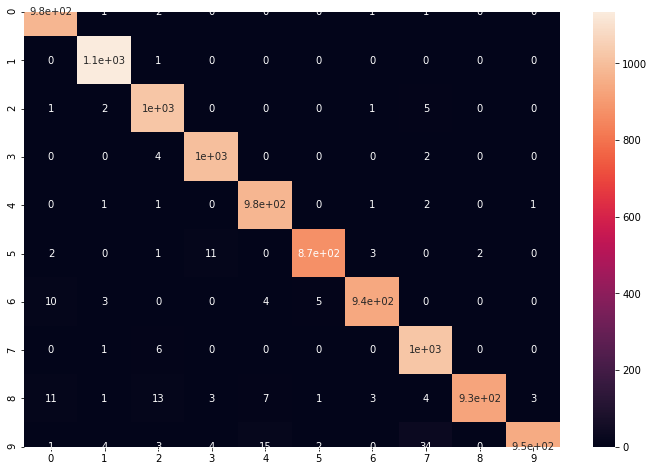

In [71]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [120]:
#prediction
new_image= x_scaled_test[3]

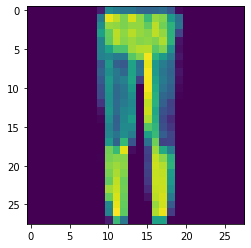

In [121]:
plt.imshow(new_image.reshape(28,28))

In [122]:
model.predict_classes(new_image.reshape(1,28,28,1))

array([1], dtype=int64)

In [123]:
#CNN has performed well on  Fashion MNIST Dataset
